#Valorant é o E-sports que vem mais crescendo nos ultimos tempos, desde seu lançamento em 2020, o jogo é o novo FPS competitivo da Riot Games, a mesma desenvolvedora de League of Legends, que mistura bastante elementos de Overwatch e CS:GO.

#O VALORANT Masters Reykjavik 2022 é o primeiro campeonato internacional de VALORANT do ano. Ao todo são 12 times lutando pelo título, premiação em dinheiro e pontos no circuito Challengers. O Brasil terá dois representantes na competição: LOUD e NiP (Ninjas in Pyjamas).

#"O Valorant conseguiu ultrapassar a marca dos 15 milhões de jogadores ativos por mês, de acordo com o portal Talk Esports. O número foi registrado no mês de janeiro deste ano, mostrando um aumento considerável de acordo com o último dado apresentado pela Riot Games." de : https://ge.globo.com/esports/valorant/noticia/valorant-jogo-atingiu-marca-de-15-milhoes-de-jogadores-por-mes.ghtml

In [14]:
#primeiro vamos importar nossas bibliotecas padrões.
!git clone https://github.com/RaphaelMartani/Dados_LoL.git
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


Cloning into 'Dados_LoL'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 67 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (67/67), 29.81 MiB | 3.64 MiB/s, done.


In [15]:
%cd Dados_LoL

/content/Dados_LoL/Dados_LoL


In [16]:
dados_all = pd.read_csv('dados/Combined Data.csv')
dados_players = pd.read_csv('dados/Players_stats.csv', sep=';' ,encoding= "ISO-8859-1")
dados_agents = pd.read_csv('dados/agents_master_2022.csv',sep=';')

# **Analise dos agentes que foram escolhidos no mundial**

In [17]:
#Primeiro vamos arrumar o nome das colunas e depois as linhas.

dados_players.columns = dados_players.columns.str.replace('[#,@,\t]','')

<ipython-input-17-e93438a70948>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dados_players.columns = dados_players.columns.str.replace('[#,@,\t]','')


In [18]:
dados_players.head(2)

,Player,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,ScreaM\t,Team Liquid\t,Jett\t,11,210,172,75,1.22,1.65,260,19.0,15.6,6.8
1,Yay\t,OpTic Gaming\t,Chamber\t,21,417,317,69,1.31,1.53,252,19.8,15.0,3.2


In [19]:
#Agora vamos retirar esses \t das linhas do nosso trabalho.


dados_players['Player'] = dados_players['Player'].str.replace('\t','')
dados_players['Team'] = dados_players['Team'].str.replace('\t','')
dados_players['Agents'] = dados_players['Agents'].str.replace('\t','')

**Fazendo analise da nossa tabela**

In [22]:
dados_players.head(3)

,Player,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,ScreaM,Team Liquid,Jett,11,210,172,75,1.22,1.65,260,19.0,15.6,6.8
1,Yay,OpTic Gaming,Chamber,21,417,317,69,1.31,1.53,252,19.8,15.0,3.2
2,Sayaplayer,The Guard,Jett,5,95,75,15,1.26,1.46,251,19.0,15.0,3.0


In [20]:
#Analisando os times de acordo com os KDA.

kdas = ['Team','Maps','KDA']
kda = dados_players.filter(items=kdas)
kda.groupby(['Team']).mean()

,Maps,KDA
Team,,
DRX,13.0,1.522
Fnatic,4.0,1.178
G2 Esports,6.0,1.216
KRÃ Esports,4.0,1.134
LOUD,11.0,1.370
Ninjas in Pyjamas,7.0,1.282
OpTic Gaming,21.0,1.468
Paper Rex,10.0,1.384
Team Liquid,11.0,1.436


**Conseguimos ver a quantidade de jogo por time x KD/A dos mesmo e podemos ver que a influencia de mais jogos impactou nesse resultado.**

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 156 (\x9c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 156 (\x9c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


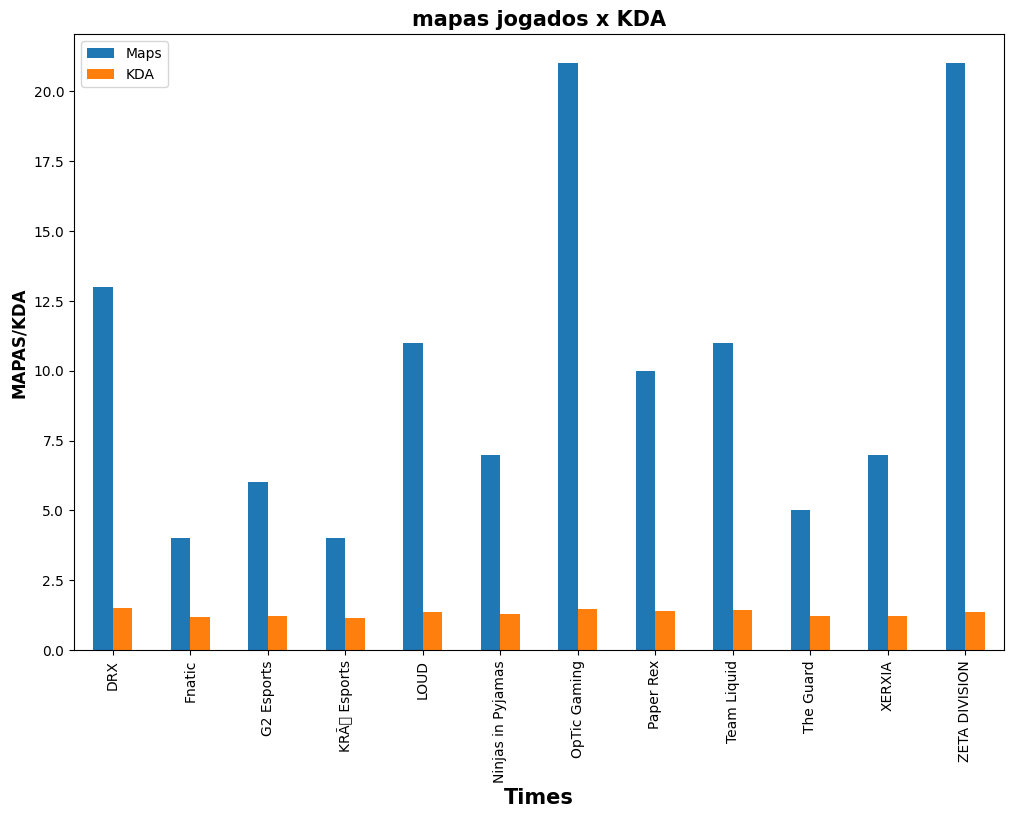

In [21]:
#Fazendo nosso grafico para compararmos os mapas jogados com os kd/as

kda.groupby(['Team']).mean().plot(kind='bar',figsize=(12,8))
plt.title("mapas jogados x KDA",fontsize=15, fontweight='bold')
plt.xlabel("Times", fontsize=15, fontweight='bold')
plt.ylabel('MAPAS/KDA', fontsize=12, fontweight='bold');

In [23]:
kda_players = ['Player', 'KDA']
kda_player = dados_players.filter(items=kda_players)

In [24]:
dados = kda_player.sort_values(by=['KDA','Player'],ascending=False).head(5)

In [25]:
dados.head(5)

,Player,KDA
5,MaKo,1.91
12,Marved,1.67
23,Stax,1.66
0,ScreaM,1.65
15,SugarZ3ro,1.64


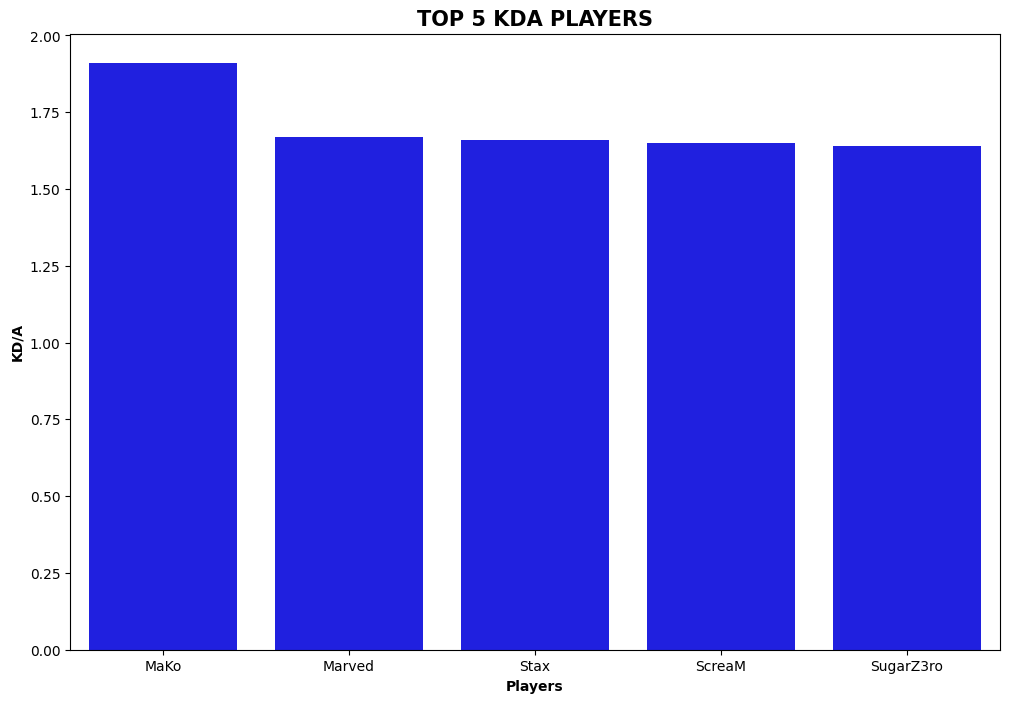

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y='KDA', x='Player', data=dados, color = '#0000FF')
ax.set_title("TOP 5 KDA PLAYERS", fontsize=15, fontweight='bold')
ax.set_xlabel("Players", fontsize=10, fontweight='bold')
ax.set_ylabel("KD/A", fontsize=10, fontweight='bold');


In [27]:
#Os personagens mais utilizados pelos profissionais.

agente = ['Player','Agents']
agentes = dados_players.filter(items=agente)

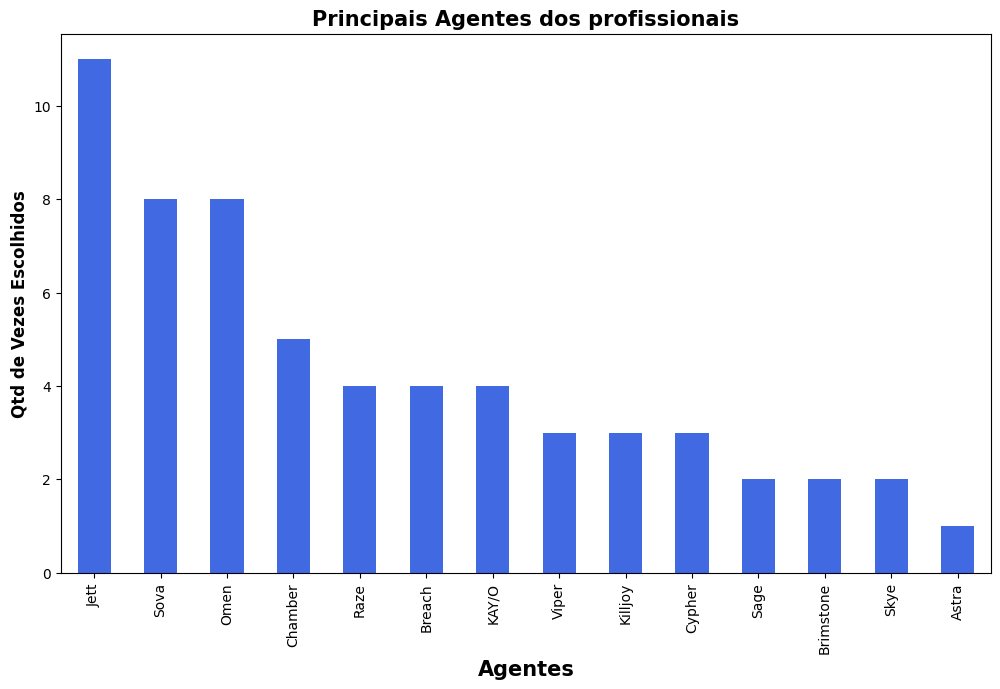

In [28]:
#Quantidade de vezes que o personagem foi o escolhido pelos profissionais.

plt.figure(figsize=(12,7))

agentes['Agents'].value_counts().plot(kind="bar", color = "royalblue")
plt.title("Principais Agentes dos profissionais",fontsize=15, fontweight='bold')
plt.xlabel("Agentes", fontsize=15, fontweight='bold')
plt.ylabel('Qtd de Vezes Escolhidos', fontsize=12, fontweight='bold');

# Agora vamos estudar a porcentagem de vitorias e picks dos agentes

In [29]:
#Dado dos agentes em porcentagem durante os seus picks no campeonato.
dados_agents

,Agents,Overall Pick Rate,Split,Bind,Haven,Ascent,Icebox,Breeze,Fracture
0,Jett,65.00,40.0,0.00,83.33,100.00,79.17,100.00,37.50
1,Sova,49.17,0.0,8.33,22.22,100.00,100.00,100.00,0.00
2,Viper,45.83,40.0,83.33,0.00,0.00,100.00,100.00,43.75
3,Chamber,44.17,15.0,41.67,33.33,25.00,58.33,100.00,81.25
4,Sage,42.50,90.0,33.33,0.00,12.50,95.83,0.00,18.75
5,Omen,38.33,50.0,16.67,77.78,79.17,4.17,0.00,0.00
6,Kay/o,33.33,5.0,0.00,16.67,70.83,37.50,83.33,31.25
7,Skye,32.50,45.0,100.00,77.78,12.50,0.00,16.67,0.00
8,Breach,30.00,35.0,16.67,66.67,0.00,0.00,0.00,93.75
9,Raze,28.33,80.0,100.00,0.00,0.00,0.00,0.00,37.50


In [30]:
#Renomeando o pickrate para ser melhor estudado
dados_agents.rename(columns={'Overall Pick Rate':'PickRate'},inplace=True)

In [31]:
#Separando os melhores agentes em cada mapa para analise.
pick1 = ['Agents', 'PickRate']
PickRate = dados_agents.filter(items=pick1)

pick2 = ['Agents', 'Split']
Split = dados_agents.filter(items=pick2)

pick3 = ['Agents', 'Bind']
Bind = dados_agents.filter(items=pick3)

pick4 = ['Agents', 'Haven']
Haven = dados_agents.filter(items=pick4)

pick5 = ['Agents', 'Ascent']
Ascent = dados_agents.filter(items=pick5)

pick6 = ['Agents', 'Icebox']
Icebox = dados_agents.filter(items=pick6)

pick7 = ['Agents', 'Breeze']
Breeze = dados_agents.filter(items=pick7)

pick8 = ['Agents', 'Fracture']
Fracture = dados_agents.filter(items=pick8)

In [32]:
#agora vamos organizar para temos os melhores de cada mapa e os mais utilizados.

Split= Split.sort_values(by=['Split','Agents'],ascending=False)
PickRate= PickRate.sort_values(by=['PickRate','Agents'],ascending=False)
Bind= Bind.sort_values(by=['Bind','Agents'],ascending=False)
Haven= Haven.sort_values(by=['Haven','Agents'],ascending=False)
Ascent= Ascent.sort_values(by=['Ascent','Agents'],ascending=False)
Icebox= Icebox.sort_values(by=['Icebox','Agents'],ascending=False)
Breeze= Breeze.sort_values(by=['Breeze','Agents'],ascending=False)
Fracture= Fracture.sort_values(by=['Fracture','Agents'],ascending=False)

In [33]:
Split.head()

,Agents,Split
4,Sage,90.0
9,Raze,80.0
5,Omen,50.0
11,Astra,50.0
7,Skye,45.0


In [34]:
PickRate.head()

,Agents,PickRate
0,Jett,65.00
1,Sova,49.17
2,Viper,45.83
3,Chamber,44.17
4,Sage,42.50


**Os agentes preferidos dos profissionais durante o campeonato**

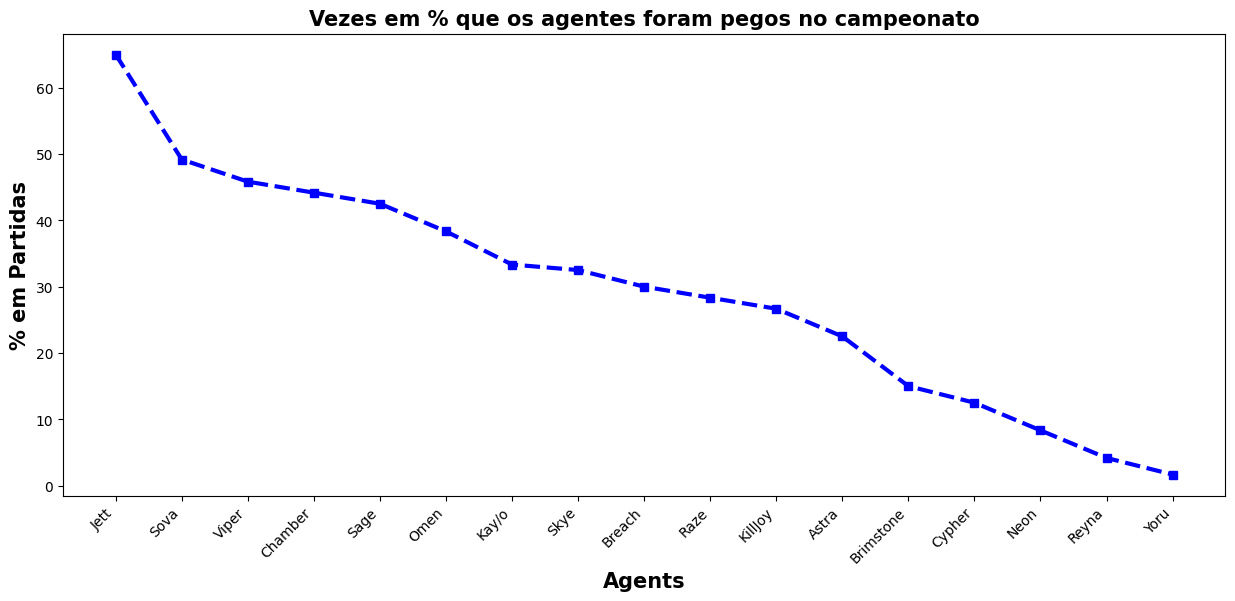

In [35]:
plt.figure(figsize=(15,6))
plt.title('Vezes em % que os agentes foram pegos no campeonato', fontsize= 15, fontweight='bold')
plt.xlabel('Agents', fontsize= 15, fontweight='bold')
plt.ylabel('% em Partidas', fontsize= 15, fontweight='bold')
plt.plot(PickRate['Agents'], PickRate['PickRate'], linestyle='--', color='b', marker='s',
         linewidth=3.0)
plt.xticks(rotation=45, ha= 'right')
plt.show()

**Agora vamos analisar por mapas, quais foram os melhores agentes de cada um deles**

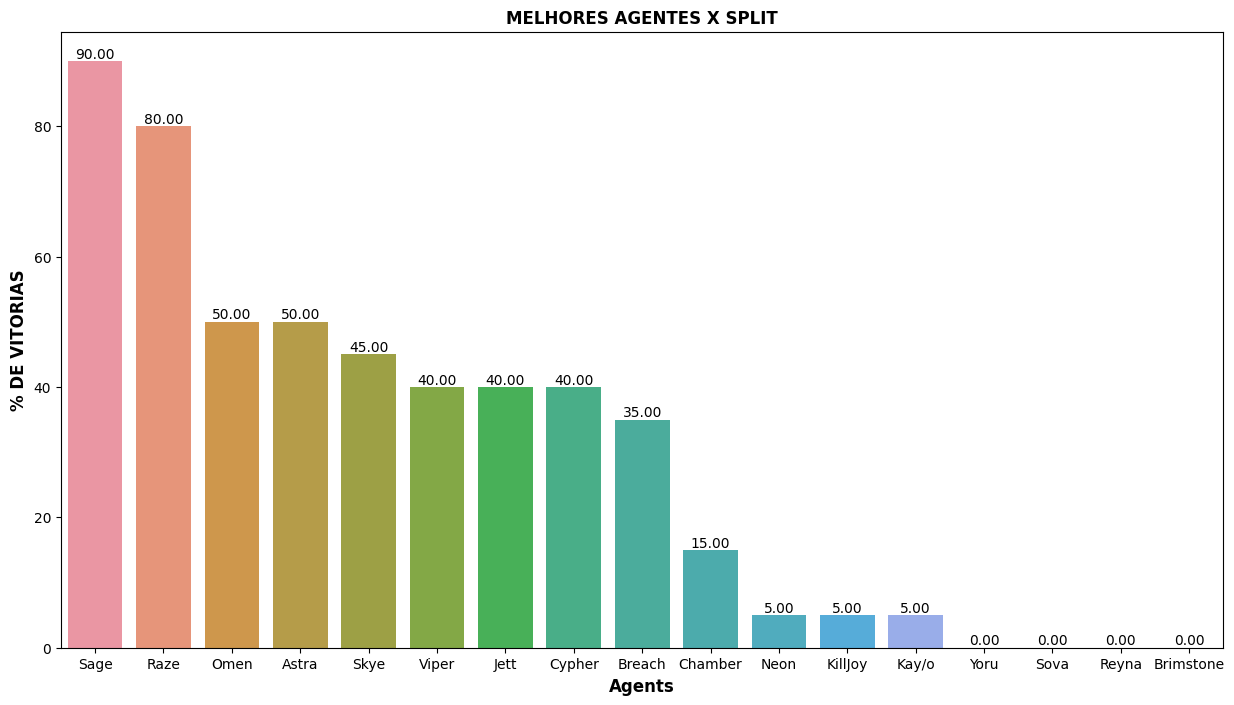

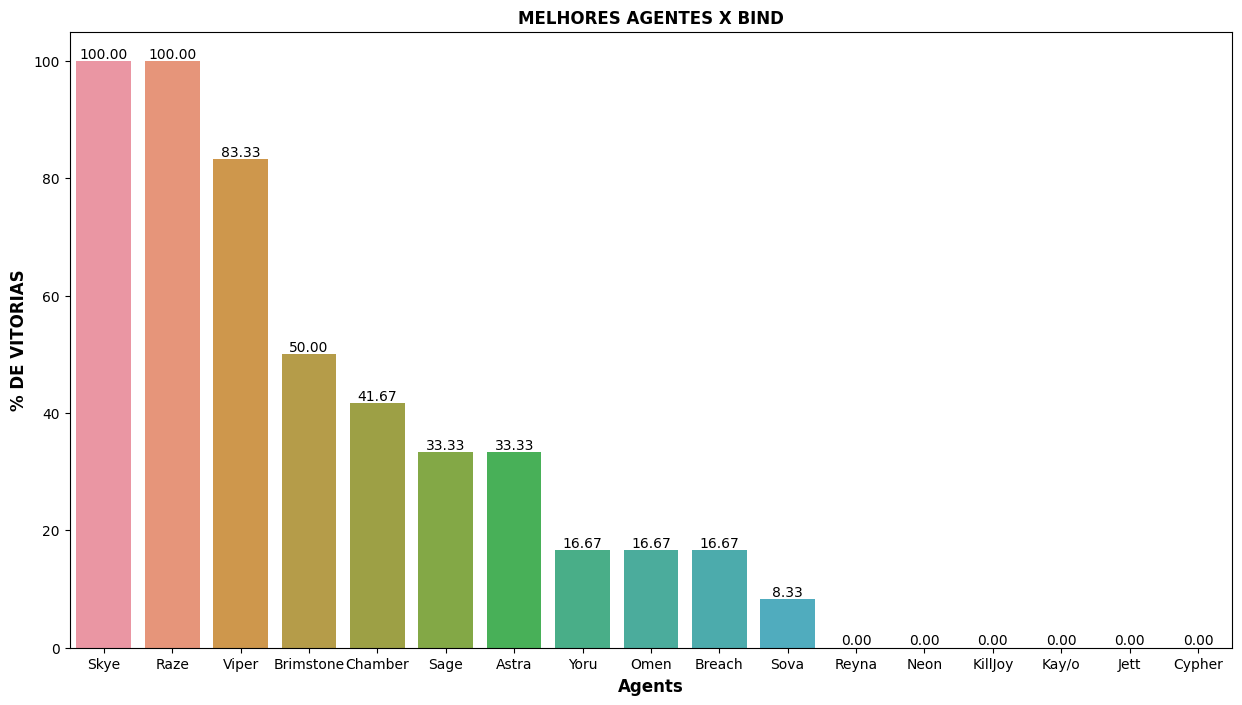

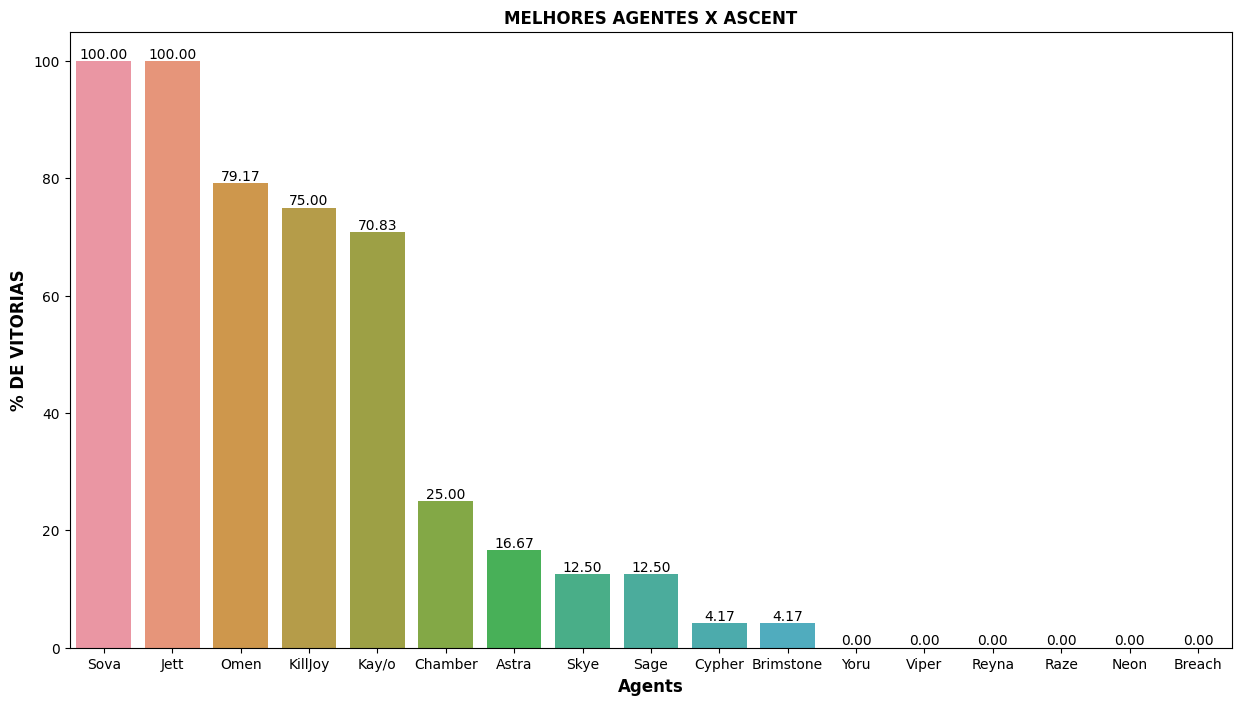

In [36]:
#Agentes com a % de vitoria na split
plt.figure(figsize=(15, 8))
plots = sns.barplot(x="Agents", y="Split", data=Split)
for bar in plots.patches:



    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')


plt.title("MELHORES AGENTES X SPLIT",fontsize= 12, fontweight='bold')
plt.xlabel('Agents',fontsize= 12, fontweight='bold')
plt.ylabel('% DE VITORIAS',fontsize= 12, fontweight='bold');


#Agentes com a % de vitoria na Bind
plt.figure(figsize=(15, 8))
plots = sns.barplot(x="Agents", y="Bind", data=Bind)
for bar in plots.patches:



    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')


plt.title("MELHORES AGENTES X BIND",fontsize= 12, fontweight='bold')
plt.xlabel('Agents',fontsize= 12, fontweight='bold')
plt.ylabel('% DE VITORIAS',fontsize= 12, fontweight='bold');

#Agentes com a % de vitoria na Ascent
plt.figure(figsize=(15, 8))
plots = sns.barplot(x="Agents", y="Ascent", data=Ascent)
for bar in plots.patches:



    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')


plt.title("MELHORES AGENTES X ASCENT",fontsize= 12, fontweight='bold')
plt.xlabel('Agents',fontsize= 12, fontweight='bold')
plt.ylabel('% DE VITORIAS',fontsize= 12, fontweight='bold');



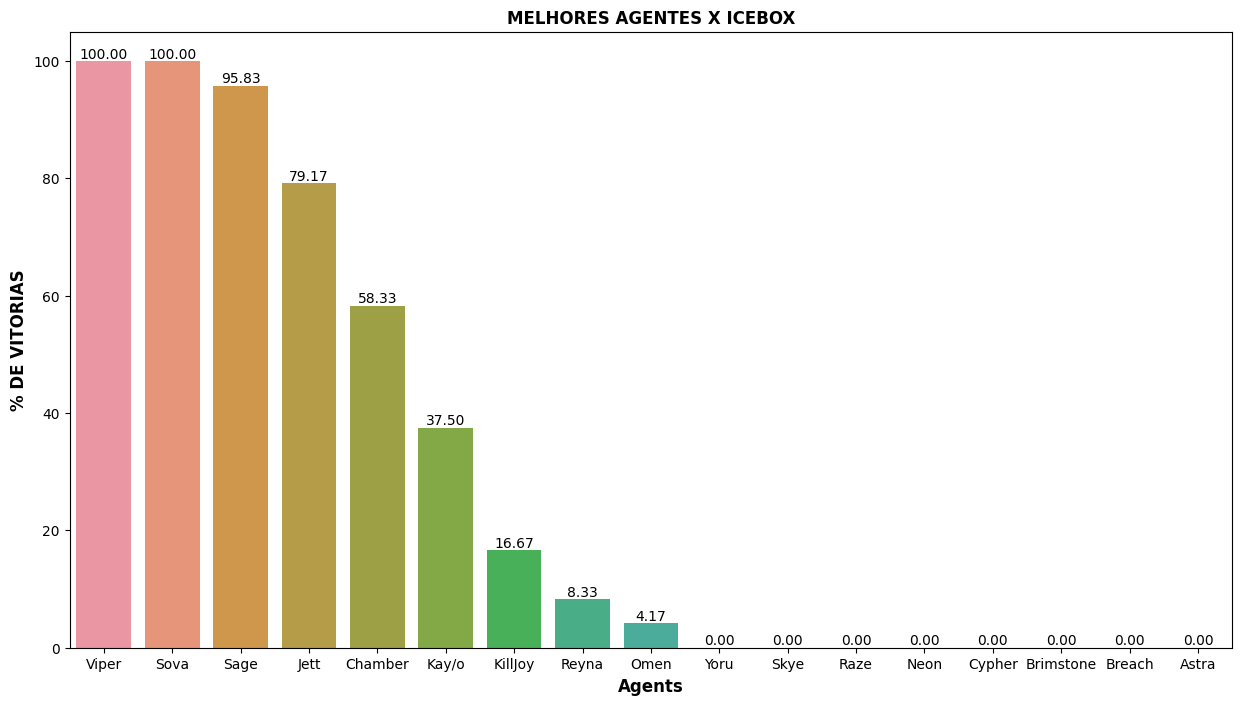

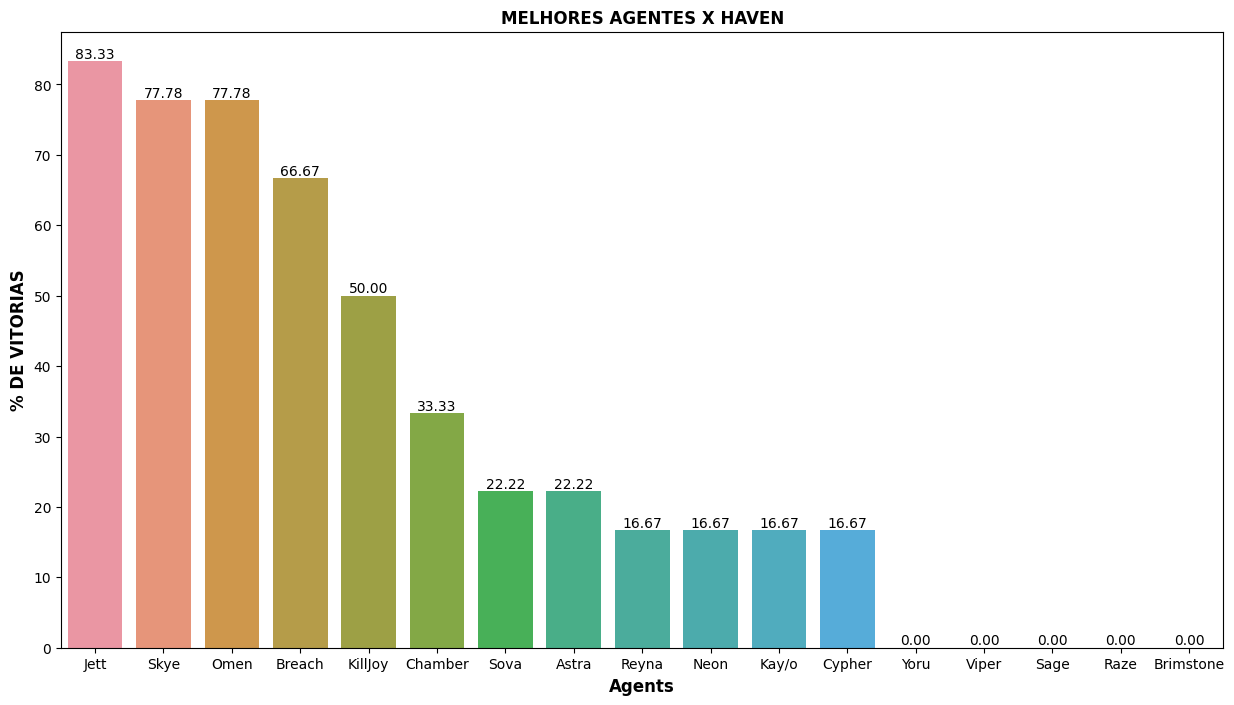

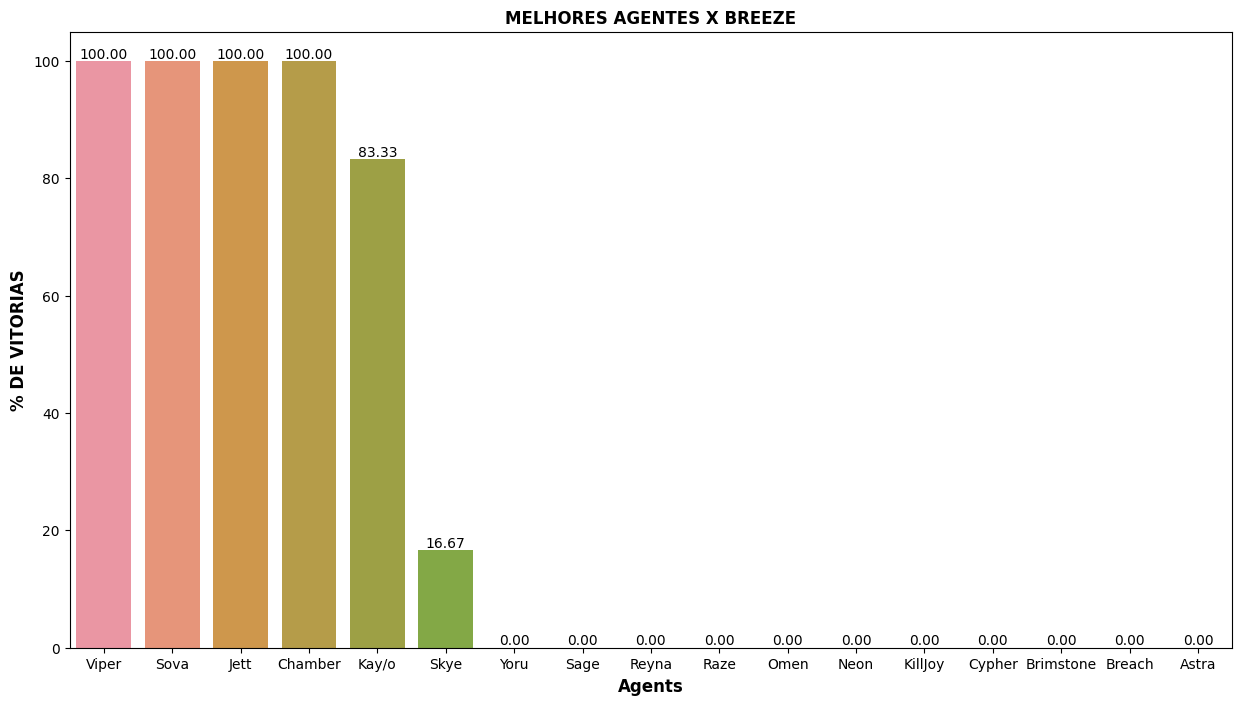

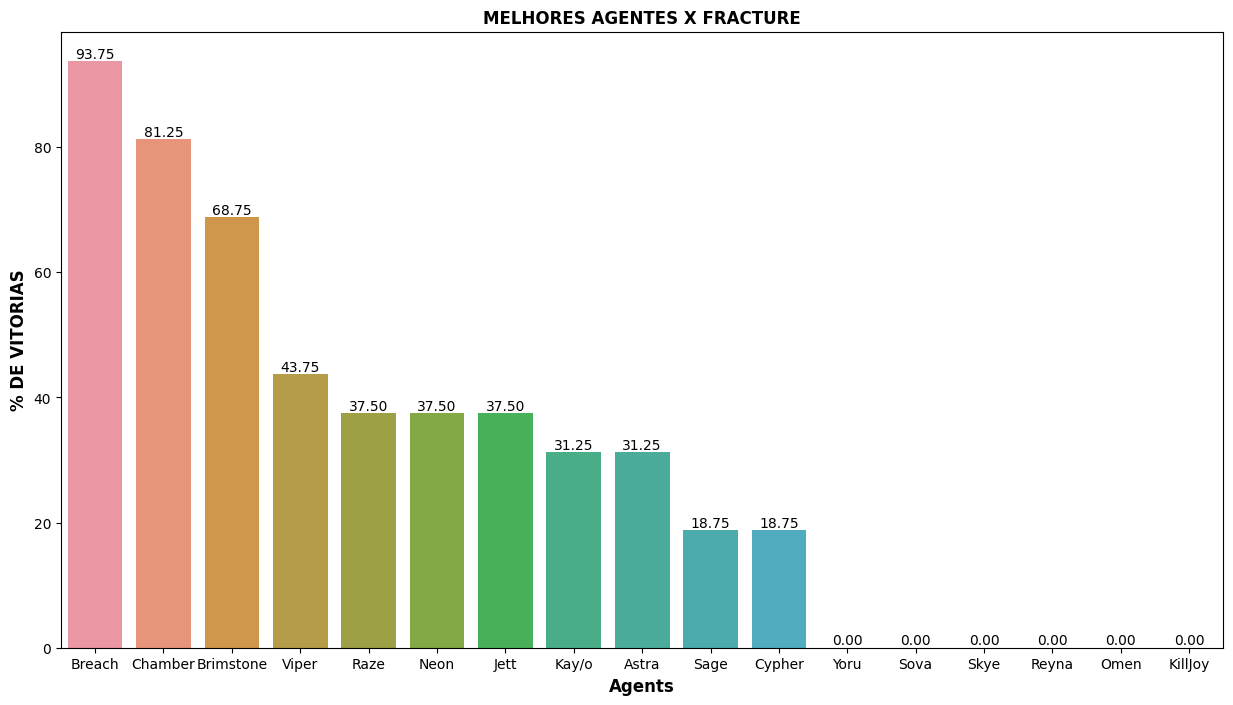

In [37]:
#Agentes com a % de vitoria na Icebox
plt.figure(figsize=(15, 8))
plots = sns.barplot(x="Agents", y="Icebox", data=Icebox)
for bar in plots.patches:



    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')


plt.title("MELHORES AGENTES X ICEBOX",fontsize= 12, fontweight='bold')
plt.xlabel('Agents',fontsize= 12, fontweight='bold')
plt.ylabel('% DE VITORIAS',fontsize= 12, fontweight='bold');


#Agentes com a % de vitoria na Haven
plt.figure(figsize=(15, 8))
plots = sns.barplot(x="Agents", y="Haven", data=Haven)
for bar in plots.patches:



    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')


plt.title("MELHORES AGENTES X HAVEN",fontsize= 12, fontweight='bold')
plt.xlabel('Agents',fontsize= 12, fontweight='bold')
plt.ylabel('% DE VITORIAS',fontsize= 12, fontweight='bold');


#Agentes com a % de vitoria na Breeze
plt.figure(figsize=(15, 8))
plots = sns.barplot(x="Agents", y="Breeze", data=Breeze)
for bar in plots.patches:



    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')


plt.title("MELHORES AGENTES X BREEZE",fontsize= 12, fontweight='bold')
plt.xlabel('Agents',fontsize= 12, fontweight='bold')
plt.ylabel('% DE VITORIAS',fontsize= 12, fontweight='bold');

#Agentes com a % de vitoria na Breeze
plt.figure(figsize=(15, 8))
plots = sns.barplot(x="Agents", y="Fracture", data=Fracture)
for bar in plots.patches:



    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')


plt.title("MELHORES AGENTES X FRACTURE",fontsize= 12, fontweight='bold')
plt.xlabel('Agents',fontsize= 12, fontweight='bold')
plt.ylabel('% DE VITORIAS',fontsize= 12, fontweight='bold');

# **Vamos fazer as analises dos dados e gráficas dos nossos mapas**

In [38]:
dados_all

,Map,TotalPicks,GroupAPicks,GroupBPicks,PlayoffsPicks,TotalBans,GroupABans,GroupBBans,PlayoffsBans,AtkWins,AtkWin%,DefWins,DefWin%
0,Ascent,13,1,5,7,11,4,0,7,130,46.9,147,53.1
1,Bind,6,0,1,5,18,5,4,9,63,48.8,66,51.2
2,Breeze,4,2,0,2,20,3,5,12,44,60.3,29,39.7
3,Fracture,9,3,2,4,14,2,3,9,75,46.0,88,54.0
4,Haven,14,2,4,8,10,3,1,6,91,51.4,86,48.6
5,Icebox,19,5,2,12,5,0,3,2,135,51.9,125,48.1
6,Split,11,2,1,8,12,3,4,5,97,45.8,115,54.2


In [39]:
dados_all.isnull().sum()

Map              0
TotalPicks       0
GroupAPicks      0
GroupBPicks      0
PlayoffsPicks    0
TotalBans        0
GroupABans       0
GroupBBans       0
PlayoffsBans     0
AtkWins          0
AtkWin%          0
DefWins          0
DefWin%          0
dtype: int64

In [40]:
dados_all.describe()

,TotalPicks,GroupAPicks,GroupBPicks,PlayoffsPicks,TotalBans,GroupABans,GroupBBans,PlayoffsBans,AtkWins,AtkWin%,DefWins,DefWin%
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,10.857143,2.142857,2.142857,6.571429,12.857143,2.857143,2.857143,7.142857,90.714286,50.157143,93.714286,49.842857
std,5.080307,1.573592,1.772811,3.258688,5.047394,1.573592,1.772811,3.236694,33.519717,5.101914,39.411142,5.101914
min,4.000000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,2.000000,44.000000,45.800000,29.000000,39.700000
25%,7.500000,1.500000,1.000000,4.500000,10.500000,2.500000,2.000000,5.500000,69.000000,46.450000,76.000000,48.350000
50%,11.000000,2.000000,2.000000,7.000000,12.000000,3.000000,3.000000,7.000000,91.000000,48.800000,88.000000,51.200000
75%,13.500000,2.500000,3.000000,8.000000,16.000000,3.500000,4.000000,9.000000,113.500000,51.650000,120.000000,53.550000
max,19.000000,5.000000,5.000000,12.000000,20.000000,5.000000,5.000000,12.000000,135.000000,60.300000,147.000000,54.200000


In [41]:
lista1 = ['Map','TotalPicks','GroupAPicks','GroupBPicks','PlayoffsPicks']
escolha_mapas = dados_all.filter(items=lista1)

In [42]:
escolha_mapas

,Map,TotalPicks,GroupAPicks,GroupBPicks,PlayoffsPicks
0,Ascent,13,1,5,7
1,Bind,6,0,1,5
2,Breeze,4,2,0,2
3,Fracture,9,3,2,4
4,Haven,14,2,4,8
5,Icebox,19,5,2,12
6,Split,11,2,1,8


In [43]:
lista2 = ['Map','TotalPicks', 'AtkWins','AtkWin%','DefWins','DefWin%']
lados = dados_all.filter(items=lista2)

In [44]:
lados

,Map,TotalPicks,AtkWins,AtkWin%,DefWins,DefWin%
0,Ascent,13,130,46.9,147,53.1
1,Bind,6,63,48.8,66,51.2
2,Breeze,4,44,60.3,29,39.7
3,Fracture,9,75,46.0,88,54.0
4,Haven,14,91,51.4,86,48.6
5,Icebox,19,135,51.9,125,48.1
6,Split,11,97,45.8,115,54.2


In [45]:
lista3 = ['Map', 'TotalBans','GroupABans','GroupBBans','PlayoffsBans']
ban_mapas = dados_all.filter(items=lista3)


In [46]:
ban_mapas

,Map,TotalBans,GroupABans,GroupBBans,PlayoffsBans
0,Ascent,11,4,0,7
1,Bind,18,5,4,9
2,Breeze,20,3,5,12
3,Fracture,14,2,3,9
4,Haven,10,3,1,6
5,Icebox,5,0,3,2
6,Split,12,3,4,5


# **Agora vamos fazer a nossa visualização gráfica dos itens acima em ordem.**

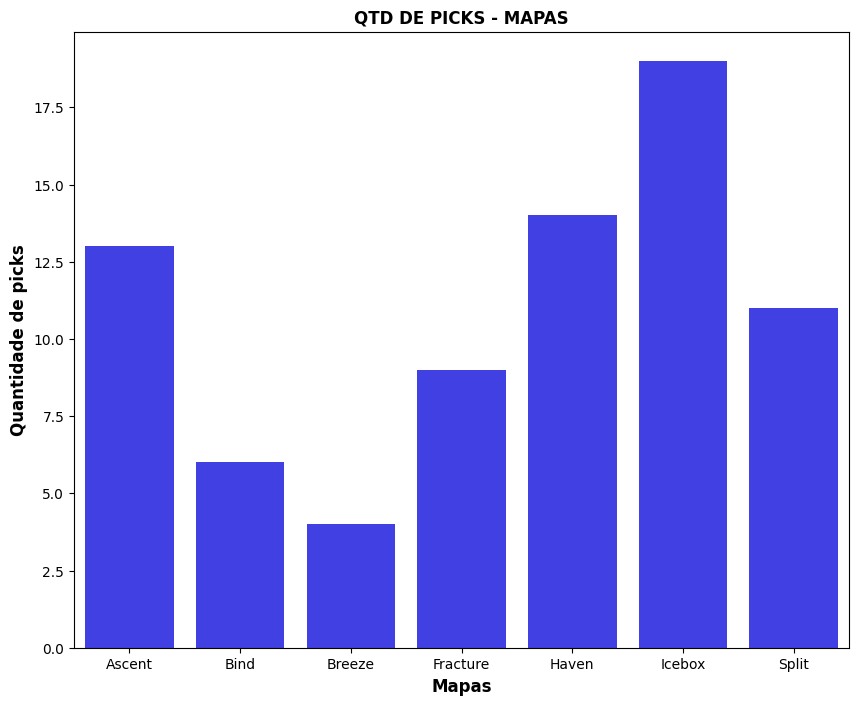

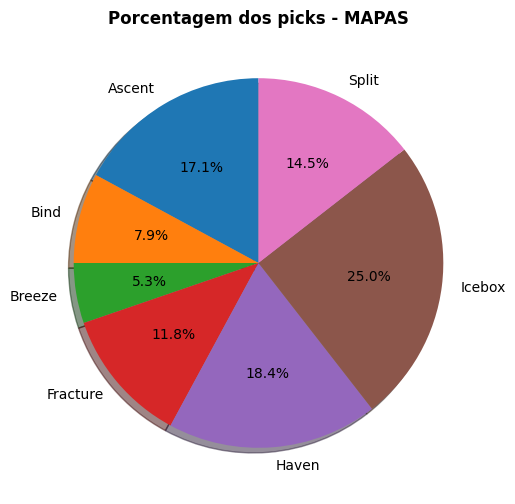

In [47]:
#Primeiro vamos fazer das escolhas dos mapas.

fig, ax = plt.subplots(figsize=(10, 8))

#Plot de barra
sns.barplot(x='Map', y='TotalPicks', data=escolha_mapas, color = '#0000FF', alpha = 0.85)

#Plot de torta

plt.figure(figsize=(15,6))
plt.title('Porcentagem dos picks - MAPAS',fontsize=12, fontweight='bold')
Analise = round(escolha_mapas['Map'].value_counts(normalize=True) * 100, 1)
plt.pie(escolha_mapas['TotalPicks'].head(10),
        labels = Analise.index[0:10],
        shadow=True,
        startangle = 90,
        autopct='%1.1f%%')

#Arrumando o grafico de barra.

ax.set_title("QTD DE PICKS - MAPAS", fontsize=12, fontweight='bold')
ax.set_xlabel("Mapas", fontsize=12, fontweight='bold')
ax.set_ylabel("Quantidade de picks", fontsize=12, fontweight='bold');


In [48]:
#Vamos fazer agora dos banimentos dos MAPAS.

ban_mapas

,Map,TotalBans,GroupABans,GroupBBans,PlayoffsBans
0,Ascent,11,4,0,7
1,Bind,18,5,4,9
2,Breeze,20,3,5,12
3,Fracture,14,2,3,9
4,Haven,10,3,1,6
5,Icebox,5,0,3,2
6,Split,12,3,4,5


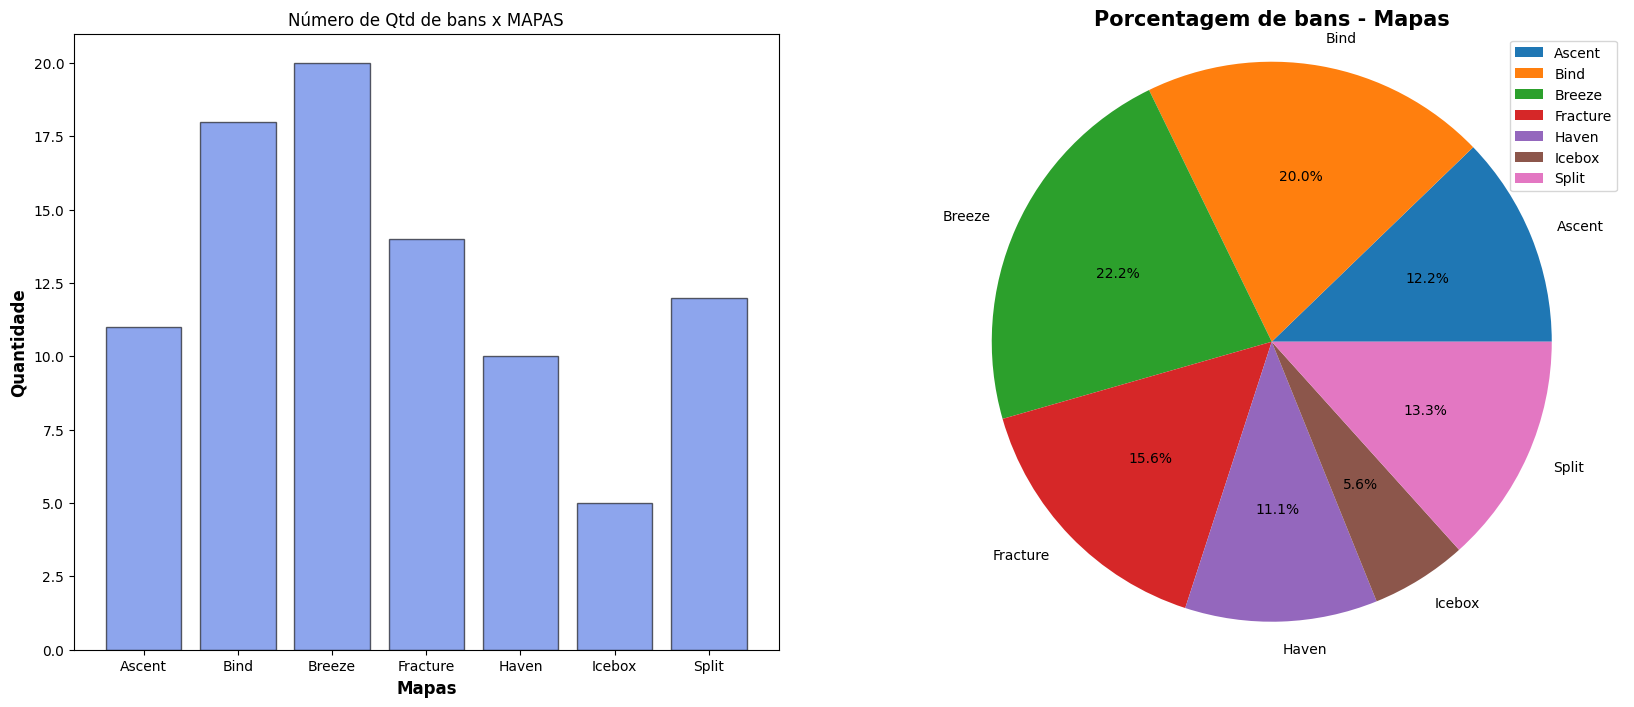

In [52]:
count = ban_mapas['TotalBans']
mapa = ban_mapas['Map']

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
#Plot de barra
plt.bar(mapa, count, ec = "k", alpha = .6, color = "royalblue")
plt.xlabel("Mapas", fontsize=12, fontweight='bold')
plt.ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.title("Número de Qtd de bans x MAPAS")


#Plot de torta
plt.subplot(1, 2, 2)
plt.pie(count, labels= mapa, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Porcentagem de bans - Mapas",fontsize=15, fontweight='bold')
plt.legend();

In [49]:
#Agora vamos pegar os lados que mais obteram derrotas e vitorias nesses mapas. (ataque/defesa)

lados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Map         7 non-null      object 
 1   TotalPicks  7 non-null      int64  
 2   AtkWins     7 non-null      int64  
 3   AtkWin%     7 non-null      float64
 4   DefWins     7 non-null      int64  
 5   DefWin%     7 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 464.0+ bytes


In [50]:
lados

,Map,TotalPicks,AtkWins,AtkWin%,DefWins,DefWin%
0,Ascent,13,130,46.9,147,53.1
1,Bind,6,63,48.8,66,51.2
2,Breeze,4,44,60.3,29,39.7
3,Fracture,9,75,46.0,88,54.0
4,Haven,14,91,51.4,86,48.6
5,Icebox,19,135,51.9,125,48.1
6,Split,11,97,45.8,115,54.2


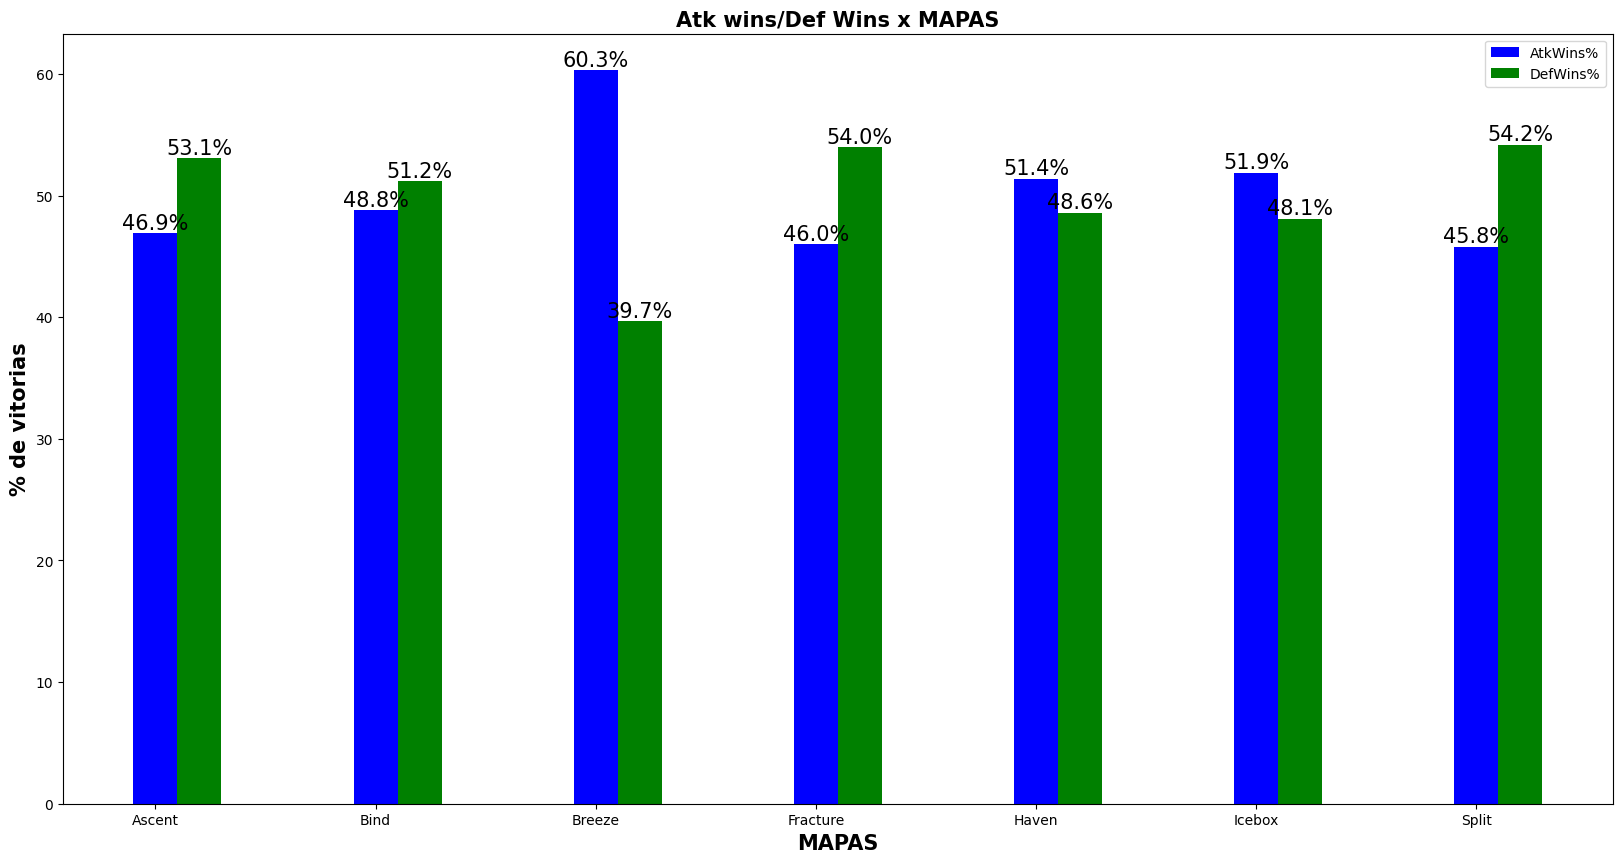

In [51]:
#Grafico sobre o total de picks e a % de vitorias atk e defesa
total = lados['TotalPicks']
atk = lados['AtkWin%']
defe = lados['DefWin%']
maps = lados['Map']

#Configurando o tamanho do grafico
barWidth = 0.2
fig, ax = plt.subplots(figsize=(20,10))

#Definindo a posição das barras

b1 = np.arange(len(total))
b2 = [x + barWidth for x in b1]
b3 = [x + barWidth for x in b2]


#Criando as barras
ax1 = ax.bar(b2, atk, width=barWidth, label='AtkWins%', color= 'Blue')
ax2 = ax.bar(b3, defe ,width=barWidth, label="DefWins%", color='Green')

#Adicionando os dados do grafico.

ax.set_xlabel('MAPAS',fontsize=15, fontweight='bold')
ax.set_xticks([r + barWidth for r in range(len(total))], ['Ascent', 'Bind', 'Breeze', 'Fracture', 'Haven', 'Icebox', 'Split'])
ax.set_ylabel("% de vitorias",fontsize=15, fontweight='bold')
ax.set_title('Atk wins/Def Wins x MAPAS', fontsize=15, fontweight='bold')
ax.legend()

#Botando rotulos nos graficos

ax.bar_label(ax1, fmt="%.01f%%", size=15, label_type="edge");
ax.bar_label(ax2, fmt="%.01f%%", size=15, label_type="edge");

# O Valorant é um game lançado em 2020 pela RIOT GAMES e desde então tem crescido absurdamente entre a comunidade de FPS durante esses dois anos online, e nesse tempo alguns agentes e mapas sempre foram mais queridinhos da galera que outros. Os agentes tem kits de habilidades que fazem cada um deles unicos. A Jett por exemplo possui uma agressividade absurda com um poder de posicionamento aonde não oferece risco caso você seja um bom jogador com a mesma, por isso ela vem dominando as estatisticas de não só a mais pegada do campeonato mas também como a preferida de todos os profissionais.
# Assim como os agentes, os mapas também tem suas individualidades, contando com:  teleportes, cordas para atravessar os mesmos, alturas e também toda uma mecânica. Icebox e a Ascent foram as preferidas para esse campeonato de nivel mundial por serem mapas mais faceis de trabalhar e pela sua rotatividade.